#**Project Name**
<h1><b><font color="#4D148C">Fed</font><font color="#FF6600">Ex</font> Logistics & Shipment Data: An Exploratory Analysis</b></h1>




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Member 1**        - Biprajit Choudhary


#**Project Summary**


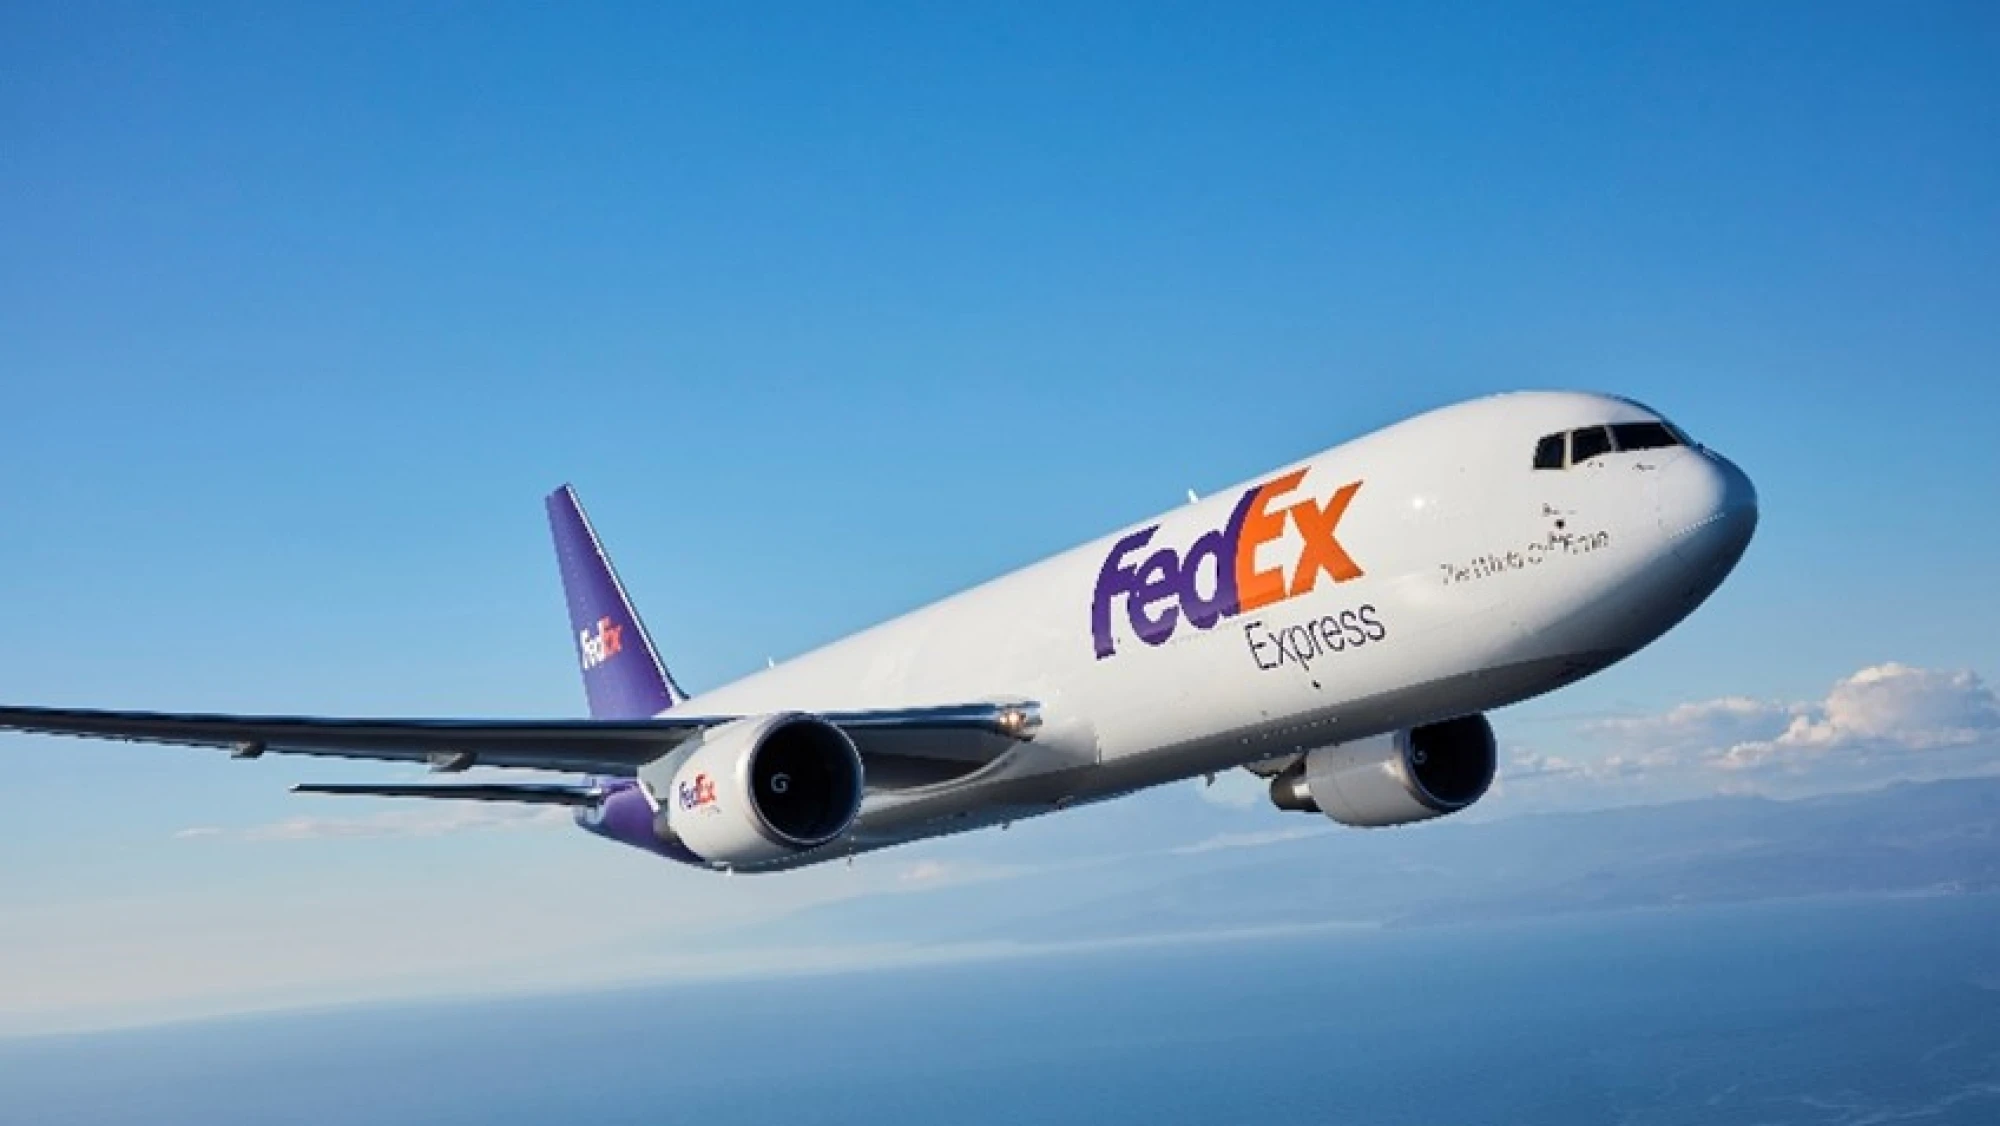This project involves an Exploratory Data Analysis (EDA) of FedEx logistics and shipment data to uncover patterns, trends, and insights related to supply chain efficiency, vendor performance, and delivery timelines. The dataset includes detailed records of purchase orders, shipments, delivery dates, product details, and associated costs such as freight and insurance.

The key objectives of this analysis are to:



*   Understand the distribution of shipments across countries and shipment modes.
* Evaluate delivery performance by comparing scheduled and actual delivery dates.  
* Analyze vendor and manufacturing site efficiency.
*Explore relationships between product types, quantities, weights, and shipping costs.
*Identify potential bottlenecks and areas for optimization in the logistics pipeline.

This EDA serves as a foundational step toward building data-driven strategies to enhance operational efficiency, reduce delays, and optimize supply chain costs.


#**Github Link**


https://github.com/Biprajit09

#**Problem Statement**

Punctual delivery of shipments is essential for guaranteeing customer satisfaction, supply chain efficiency, and operational cost savings. Regular delay in shipments and increasing insurance expenses, though, are raising questions about the efficiency of the present shipping and logistics process.

This project seeks to explore the variables that affect the performance and cost of shipment deliveries. In particular, it shall examine whether or not shipment type (e.g., mode, country of origin, weight, and INCO terms) and operating choices (e.g., team assignments, lead times) have an impact on on-time delivery rates as well as the costs of insurance.

The aim is to capture trends, inefficiencies, and actionable information that will enable stakeholders to streamline logistics operations, cut down on delays, and make strategic decisions regarding vendor participation and transport planning.



#**Bussiness Objectives**



*   Improve On-Time Delivery Rates:

  Identify key factors (e.g., shipment mode, country of origin, vendor lead time) that impact delivery delays to enhance overall shipment punctuality.



*   Optimize Shipment Planning:

  Understand the role of shipment mode and INCO terms in delivery performance to make smarter planning and logistics decisions.
  

* Reduce Shipping-Related Costs:

  Analyze how shipment characteristics (like weight) influence insurance costs, with the aim of reducing unnecessary expenses.

* Benchmark Vendor and Team Performance:

  Compare performance across internal teams and vendor processes to determine areas needing improvement or investment.

* Support Data-Driven Decision Making:

  Provide actionable insights through visualizations and statistical analysis to empower leadership and operations teams in making strategic supply chain decisions.

#**General Guidelines**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


#**Lets Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing necessiary Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

import io

# Get the first filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Use the filename to read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))






Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset.csv


### Dataset First Look

In [10]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [11]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 10324
Number of columns: 33


### Dataset Information

In [12]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [13]:
#Duplicate Values
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


### Visualizaing Missing Values

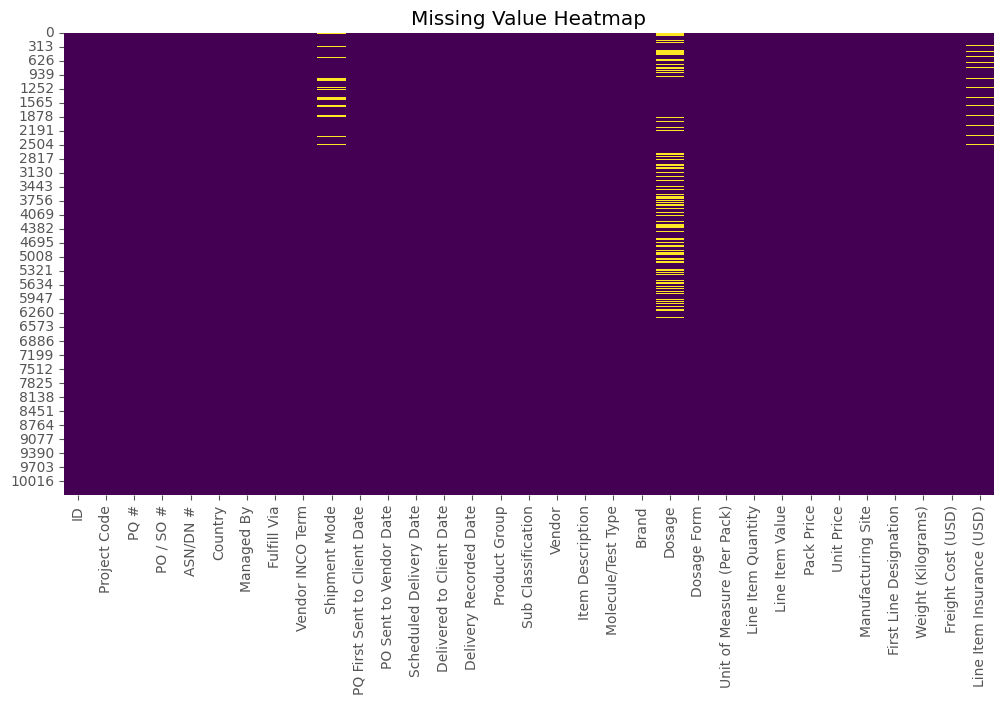

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Duplicate Values
df.duplicated().sum()

# Missing Values/Null Values
df.isnull().sum()

plt.figure(figsize=(12,6)) # Using plt.figure() to create a figure
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

### Inital Knowelgde of Dataset

After a preliminary exploration of the SCMS Delivery History dataset, I found it contains around 10,324 rows and 33 columns. The data includes shipment details such as modes of transport, delivery timing, costs, and vendor information.
Several columns have missing values (notably Dosage,shipment Mode and Line item Insurance (USD), and some date fields may need parsing. I observed that different shipment modes are used, and there may be trends worth exploring in on-time delivery and cost patterns.

## ***2. Understanding Your Variables***

#### Dataset Columns

In [16]:
#Dataset Columns
df.columns


Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

#### Dataset Describe

In [17]:
#Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

| Variable Name                | Data Type | Description                                                      | Example / Notes                          |
|-----------------------------|-----------|------------------------------------------------------------------|------------------------------------------|
| ID                          | Integer   | Unique identifier for each record                                | e.g., 1, 1500, 86823                      |
| Unit of Measure (Per Pack)  | Integer   | Number of units per pack (pack size)                             | e.g., 10 units per pack                  |
| Line Item Quantity          | Integer   | Total quantity ordered across all packs                          | e.g., 3000                               |
| Line Item Value             | Float     | Total dollar value of the line item (USD)                        | e.g., $30,471.47                         |
| Pack Price                  | Float     | Price per full pack                                              | e.g., $23.59                             |
| Unit Price                  | Float     | Price per individual unit                                        | e.g., $0.16                              |
| Line Item Insurance (USD)   | Float     | Insurance cost for the line item                                 | e.g.,287 — missing values possible   |


### Check Unique Values for each variable.

In [18]:
 #Check Unique Values for each variable.
 df.nunique()


,0
ID,10324
Project Code,142
PQ #,1237
PO / SO #,6233
ASN/DN #,7030
Country,43
Managed By,4
Fulfill Via,2
Vendor INCO Term,8
Shipment Mode,4


## ***3. Data Wrangling*** **bold text**

### Handling Null Values

In [19]:
#  Fill with a placeholder for shipment mode
df['Shipment Mode'] = df['Shipment Mode'].fillna('N/A')

#  Fill with a placeholder for shipment mode
df['Dosage'] = df['Dosage'].fillna('N/A')

# Fill with a placeholder for line item insurance
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median())

In [20]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 10324 non-null  object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

###Convert Data Types

In [22]:
# Convert Data Types
df['Unit of Measure (Per Pack)'] = df['Unit of Measure (Per Pack)'].astype(int)
df['Line Item Quantity'] = df['Line Item Quantity'].astype(int)
df['Line Item Value'] = df['Line Item Value'].astype(float)
df['Pack Price'] = df['Pack Price'].astype(float)
df['Unit Price'] = df['Unit Price'].astype(float)
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].astype(float)
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])





<ipython-input-22-de985750ad24>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])
<ipython-input-22-de985750ad24>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
<ipython-input-22-de985750ad24>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])


In [23]:
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].replace(
    ['Date Not Captured', 'Pre-PQ Process'], pd.NaT
)


In [24]:
df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'], errors='coerce')
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')


<ipython-input-24-e480149e919a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'], errors='coerce')
<ipython-input-24-e480149e919a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')


In [26]:
# Step : Convert to datetime — this will now turn those pd.NA into actual NaT
df['PQ First Sent to Client Date'] = pd.to_datetime(
    df['PQ First Sent to Client Date'], errors='coerce'
)

# Also convert PO Sent to Vendor Date
df['PO Sent to Vendor Date'] = pd.to_datetime(
    df['PO Sent to Vendor Date'], errors='coerce'
)

# Step : Now fill missing PQ dates (NaT) using PO - 30 days only where PO exists
mask_missing_pq = df['PQ First Sent to Client Date'].isna() & df['PO Sent to Vendor Date'].notna()

df.loc[mask_missing_pq, 'PQ First Sent to Client Date'] = df.loc[mask_missing_pq, 'PO Sent to Vendor Date'] - pd.Timedelta(days=30)

# Step : Now fill the remaning date
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(method='ffill')

# Step : Now filling the missing data with an average data
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(df['PQ First Sent to Client Date'].mean())



<ipython-input-26-fb5784695690>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(method='ffill')


In [27]:
# Step 1: Fill from PQ + 30
mask1 = df['PO Sent to Vendor Date'].isna() & df['PQ First Sent to Client Date'].notna()
df.loc[mask1, 'PO Sent to Vendor Date'] = df.loc[mask1, 'PQ First Sent to Client Date'] + pd.Timedelta(days=30)

# Step 2: Fill from Scheduled Delivery - 30
mask2 = df['PO Sent to Vendor Date'].isna() & df['Scheduled Delivery Date'].notna()
df.loc[mask2, 'PO Sent to Vendor Date'] = df.loc[mask2, 'Scheduled Delivery Date'] - pd.Timedelta(days=30)

# Step 3: Forward fill remaining
df = df.sort_values(by=['Vendor', 'Scheduled Delivery Date'])
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(method='ffill')


<ipython-input-27-3f0576528fca>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(method='ffill')


In [28]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10324 entries, 272 to 615
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  10324 non-null  datetime64[ns]
 11  PO Sent to Vendor Date        103

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Team Performances

### Chart - 1

In [30]:
# Creating Column On Time Delivery
df['On_Time_Delivery'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']
df['On_Time_Delivery'] = df['On_Time_Delivery'].map({True: 'On Time', False: 'Late'})

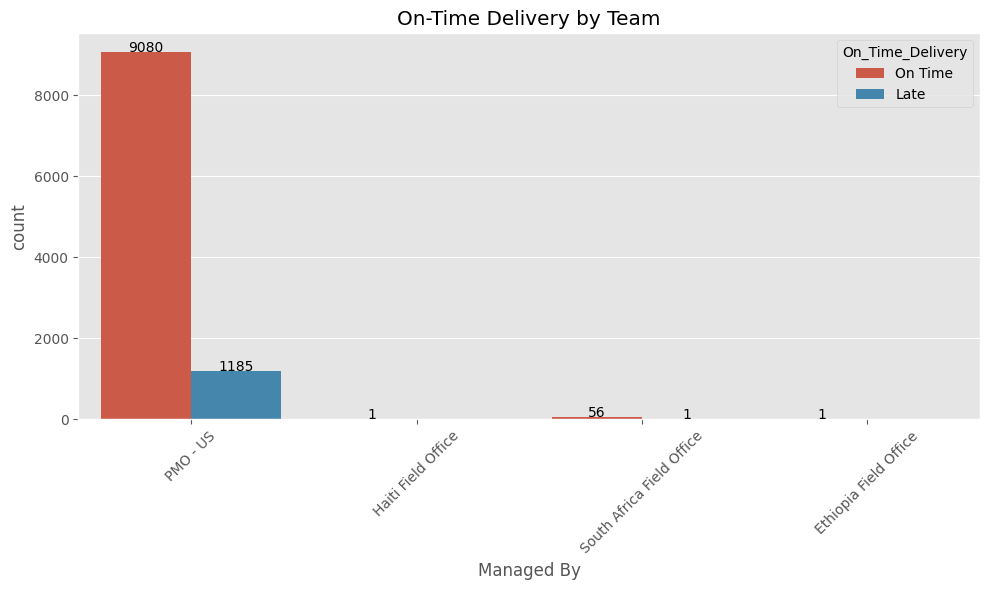

In [31]:
# Chart 1
# Plot delivery status by Team
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Managed By', hue='On_Time_Delivery', data=df)
plt.title('On-Time Delivery by Team')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 5, int(height),
                ha="center", fontsize=10, color='black')

plt.show()

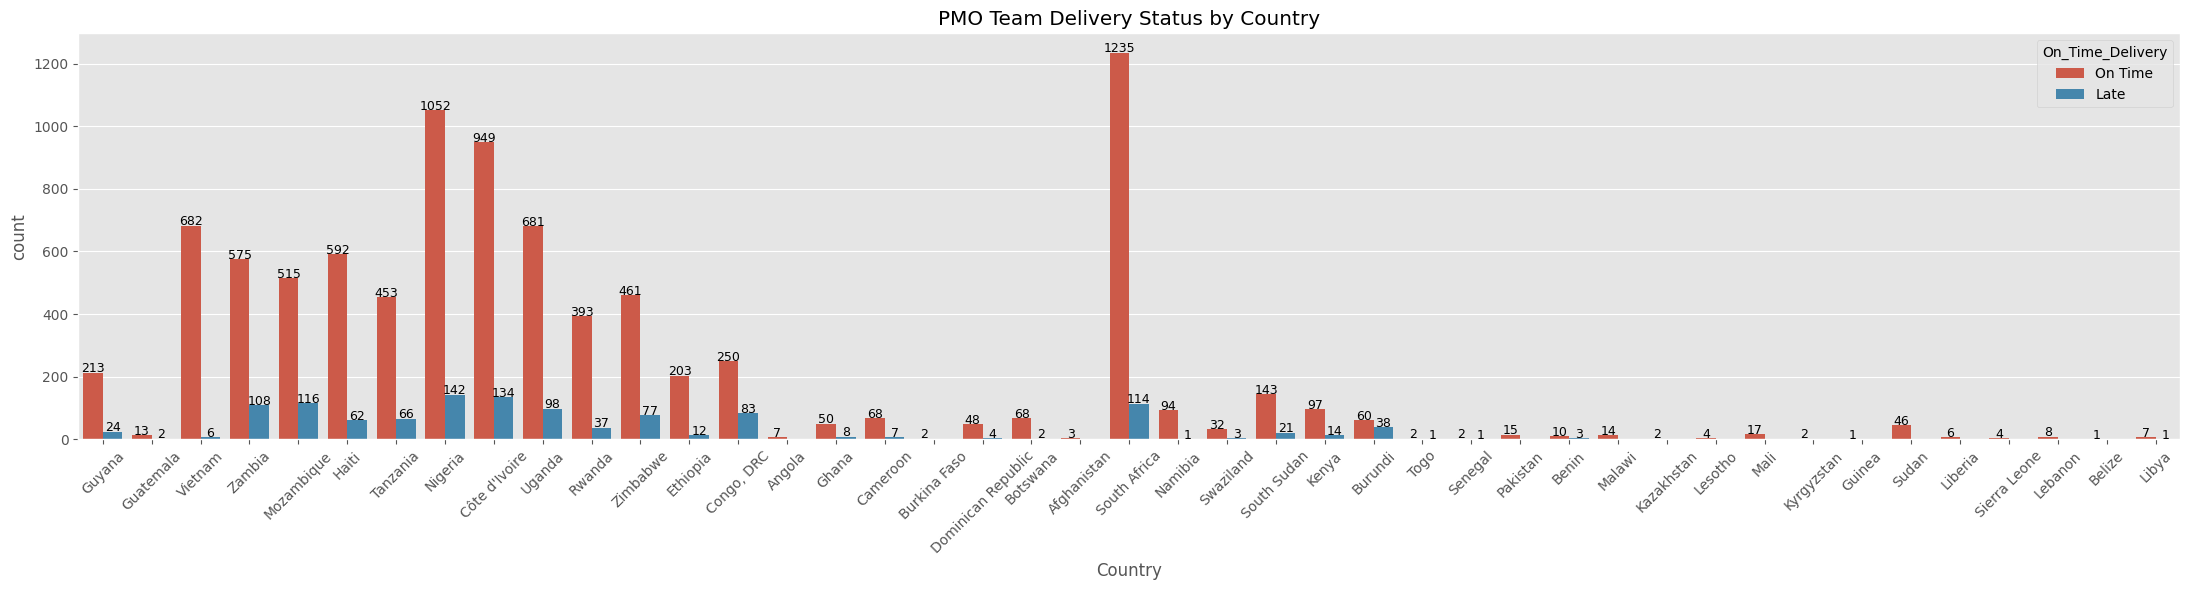

In [32]:
# Filter for rows managed by PMO - US
pmo_df = df[df['Managed By'] == 'PMO - US']

# Plot PMO performance by Country
plt.figure(figsize=(22,6))
ax = sns.countplot(data=pmo_df, x='Country', hue='On_Time_Delivery')
plt.title('PMO Team Delivery Status by Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height),
                ha='center', fontsize=9)

plt.show()

####1. Reason behind chosing the visuals.

* A grouped bar chart (Seaborn's countplot with hue) is ideal for comparing frequencies across categories.
* It helps show how different teams are performing in terms of delivery timeliness.
* Clearly distinguishes between on-time vs late deliveries using color-coded bars.

####2. What is/are the insight(s) found from the chart?

##### **Key Insights**
The PMO - US team handles the overwhelming majority of deliveries and has a relatively high rate of on-time performance, with 9,080 on-time vs. 1,185 late deliveries. Other teams like South Africa, Haiti, and Ethiopia Field Offices have very minimal contributions.The PMO - US team, responsible for the vast majority of global shipments, demonstrates strong on-time delivery performance overall, though performance varies significantly across countries.

**Supporting observations**

* PMO - US dominates shipment management, with over 9,000 on-time and 1,100 late deliveries.

* However, when analyzing by country, several regions under PMO - US show notable delays, especially.

* Countries like Tanzania and Haiti maintain strong on-time performance despite high volume.

* Other field offices like South Africa, Ethiopia, and Haiti contribute negligibly to global shipment volume, suggesting centralized operations.





####3. Will the gained insights help creating a positive business impact?


*  Performance Monitoring & Accountability
Highlights which teams (especially PMO - US) are handling the majority of deliveries and how well they perform.
 Identifies underperforming regions (e.g. Afghanistan, Pakistan) for further investigation.

*  Targeted Interventions
Enables data-driven decision-making to prioritize logistics improvements in countries with frequent late deliveries.
 Helps allocate resources (training, systems, support) more effectively.

* Process Optimization
Insight into variation across countries helps pinpoint process inefficiencies or external constraints (e.g., customs delays, vendor issues).
 May guide improvements in vendor selection, route planning, or regional strategy.

*  Service Level Improvement
Improving on-time delivery directly enhances client trust, satisfaction, and potential contract renewals.

### Chart - 2

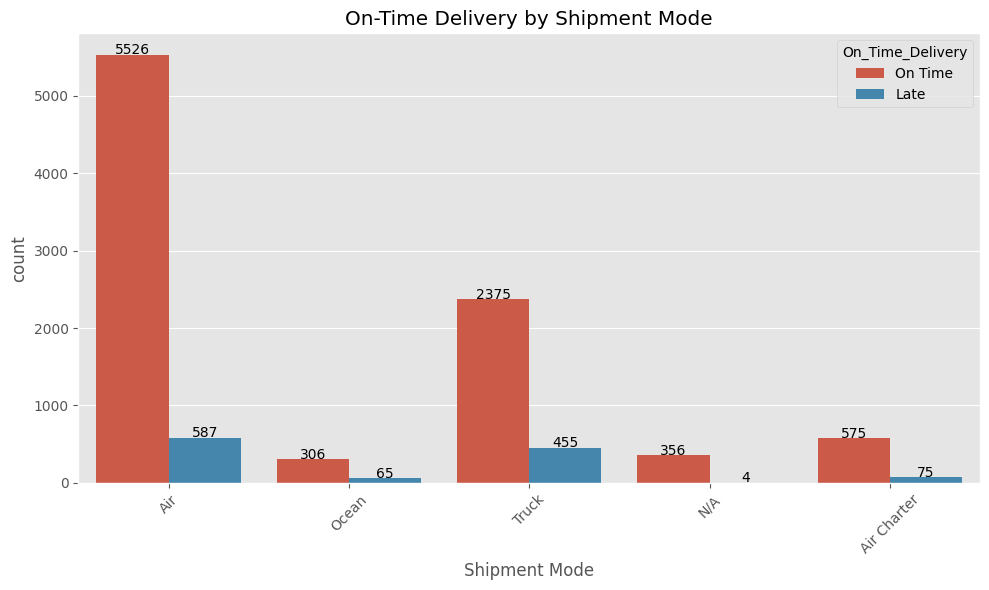

In [33]:
# Chart 2
# Plot delivery status by Team
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Shipment Mode', hue='On_Time_Delivery', data=df)
plt.title('On-Time Delivery by Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 5, int(height),
                ha="center", fontsize=10, color='black')

plt.show()

In [34]:
from scipy.stats import chi2_contingency

# Create the contingency table
data = [
    [5526, 587],    # Air
    [306, 65],      # Ocean
    [2375, 455],    # Truck
    [356, 4],       # N/A
    [575, 75]       # Air Charter
]

# Column order: [On Time, Late]
df1 = pd.DataFrame(data, columns=["On Time", "Late"],
                  index=["Air", "Ocean", "Truck", "N/A", "Air Charter"])

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(df1)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square statistic: 131.40588416852404
Degrees of freedom: 4
P-value: 1.9485869867591912e-27


####1. Reason behind chosing the visuals.

* A grouped bar chart (Seaborn's countplot with hue) is ideal for comparing frequencies across categories.
* It helps show how different Shipment Mode are performing in terms of delivery timeliness.
* Clearly distinguishes between on-time vs late deliveries using color-coded bars.

####2. What is/are the insight(s) found from the chart?

**Key Insights**
* Air shipment has the highest volume and the best on-time delivery rate, making it the most reliable shipment method operationally.
* On the other hand, truck shipments have a significantly higher number of late deliveries compared to air, suggesting a potential area for process improvement.
* Since the p-value < 0.05, you reject the null hypothesis (H₀).

* This means there is a statistically significant association between Shipment Mode and On-Time Delivery.

####3. Will the gained insights help creating a positive business impact?

This insight can be leveraged to:

* Optimize logistics planning by choosing more reliable shipment modes for time-sensitive deliveries.

* Reduce late deliveries, improving customer satisfaction and reducing penalties.

* Negotiate better contracts with providers based on performance data.

### Chart - 3

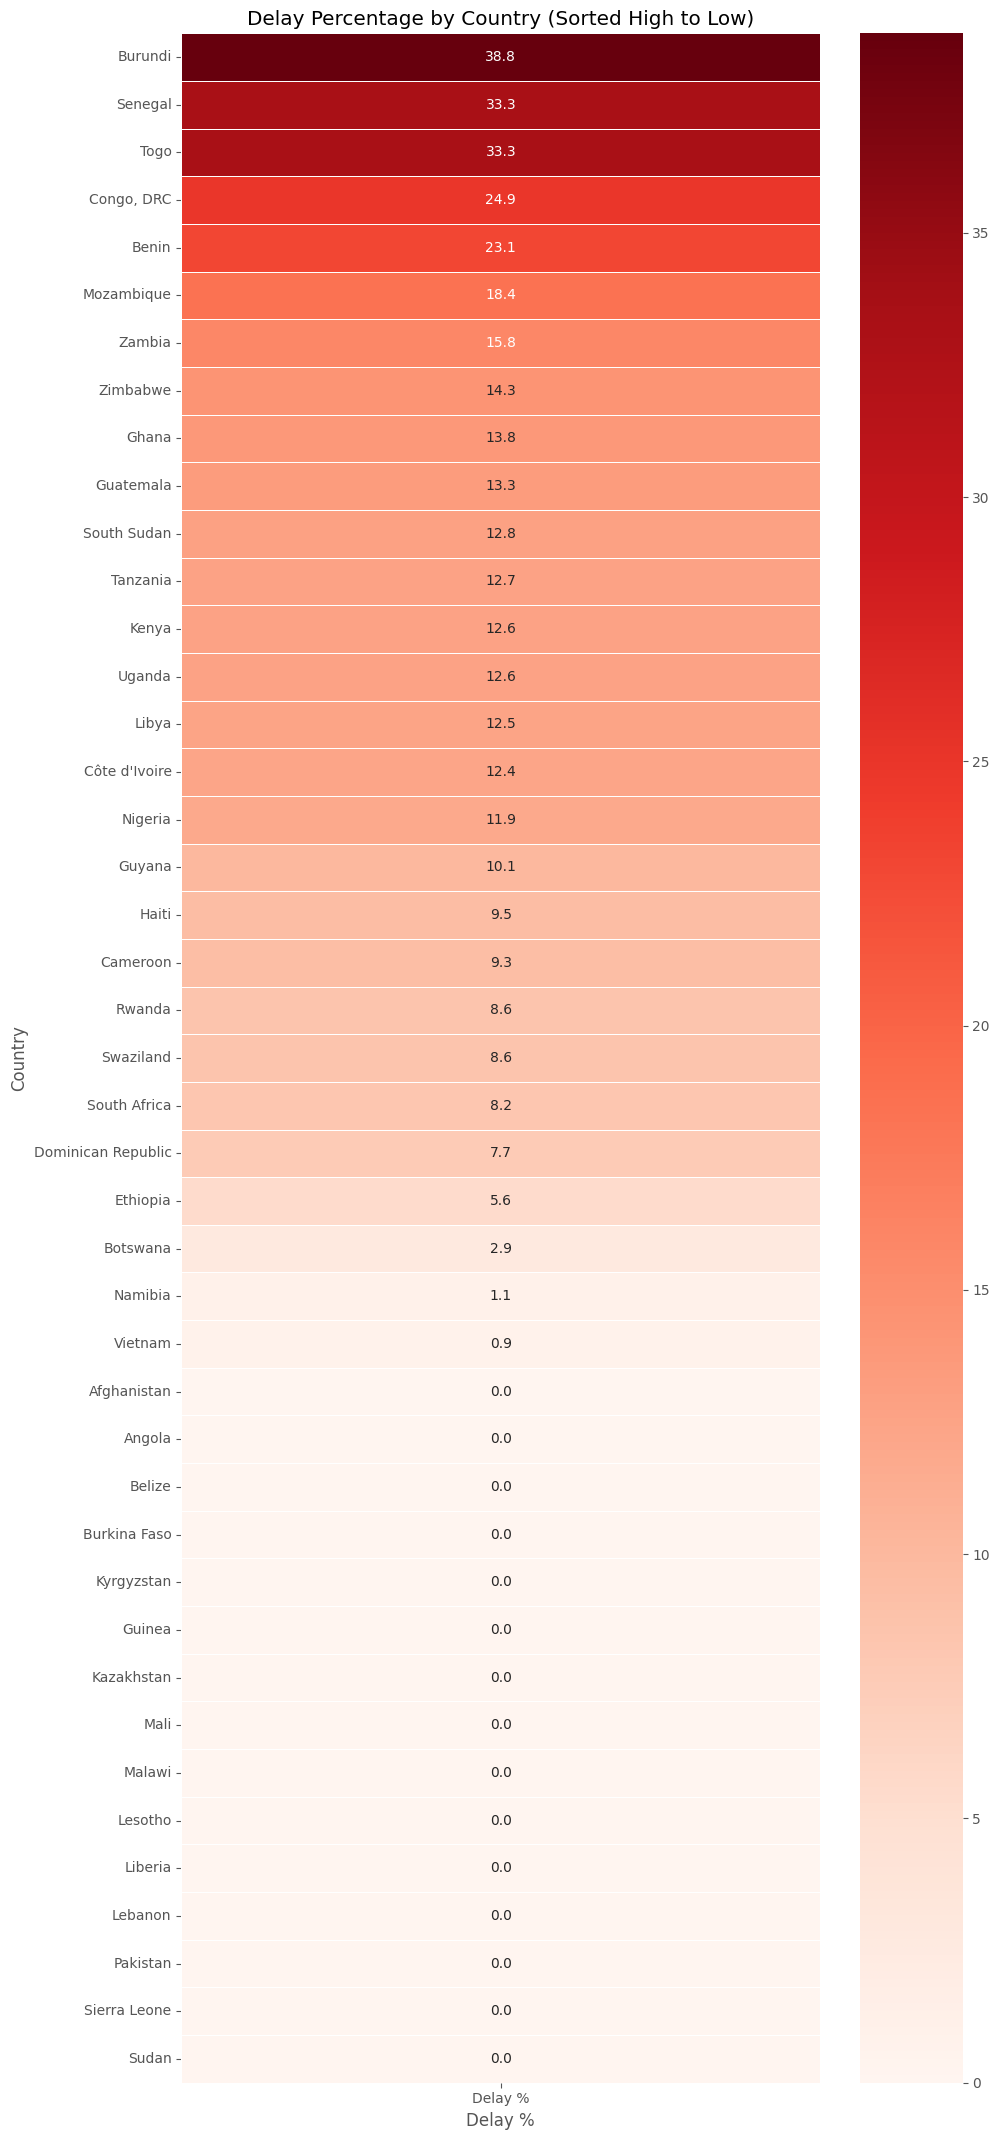

In [35]:
# Step 1: Calculate Delay % per country
delay_summary = df.groupby(['Country', 'On_Time_Delivery']).size().unstack(fill_value=0)
delay_summary['Total'] = delay_summary.sum(axis=1)
delay_summary['Delay %'] = (delay_summary.get('Late', 0) / delay_summary['Total']) * 100

# Step 2: Sort by 'Delay %' descending
delay_summary_sorted = delay_summary.sort_values(by='Delay %', ascending=False)

# Step 3: Select only the column needed for heatmap
heatmap_data = delay_summary_sorted[['Delay %']]

# Step 4: Plot heatmap
plt.figure(figsize=(10, len(heatmap_data) * 0.5))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".1f", linewidths=0.5)

plt.title('Delay Percentage by Country (Sorted High to Low)')
plt.xlabel('Delay %')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [36]:
# Step 1: Ensure the On_Time_Delivery column is created
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')
df['On_Time_Delivery'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']
df['On_Time_Delivery'] = df['On_Time_Delivery'].map({True: 'On Time', False: 'Late'})

# Step 2: Create a contingency table (Country vs Delivery Status)
contingency_table = pd.crosstab(df['Country'], df['On_Time_Delivery'])

# Step 3: Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Print the result
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-square Statistic: 324.4658547798147
Degrees of Freedom: 42
P-value: 2.609196296905232e-45


####1. Reason behind chosing the visuals.

* Clarity: A heatmap makes it easy to compare delay percentages across countries at a glance using color intensity.

* Ranking Power: Countries with higher delays appear at the top (due to sorting), helping prioritize action.

* Scalability: Handles many countries cleanly, unlike bar or pie charts which become cluttered with too many categories.



####2. What is/are the insight(s) found from the chart?

**Key Insight**

* Top Delay Contributors:

  Countries like Burundi, Senegal, and Togo have delay rates above 30%, significantly higher than others.

* Geographic Patterns:

  A cluster of high-delay countries may suggest regional logistics challenges (e.g., infrastructure or customs).

* Wide Variation:

  Delay % ranges from ~13% to nearly 39%, indicating inconsistent delivery performance across locations.

* Statistical Significance Confirmed:

  The chi-square test (p-value ≈ 2.6e-45) confirms that country is a statistically significant factor in delivery delay.



####3. Will the gained insights help creating a positive business impact?

* Targeted Improvements:

  Focus operational improvements on high-delay countries — e.g., choosing better couriers, adjusting lead times, or improving customs handling.

* Cost Savings:

  Reduced delays lower the risk of penalties, reshipments, or customer churn.

* Customer Experience Boost:

  Knowing which countries to monitor helps improve on-time delivery, increasing satisfaction and trust.

* Better Forecasting:

  Heatmap insights support data-driven SLAs (Service Level Agreements) and help set realistic delivery timelines by country.

### Chart - 4

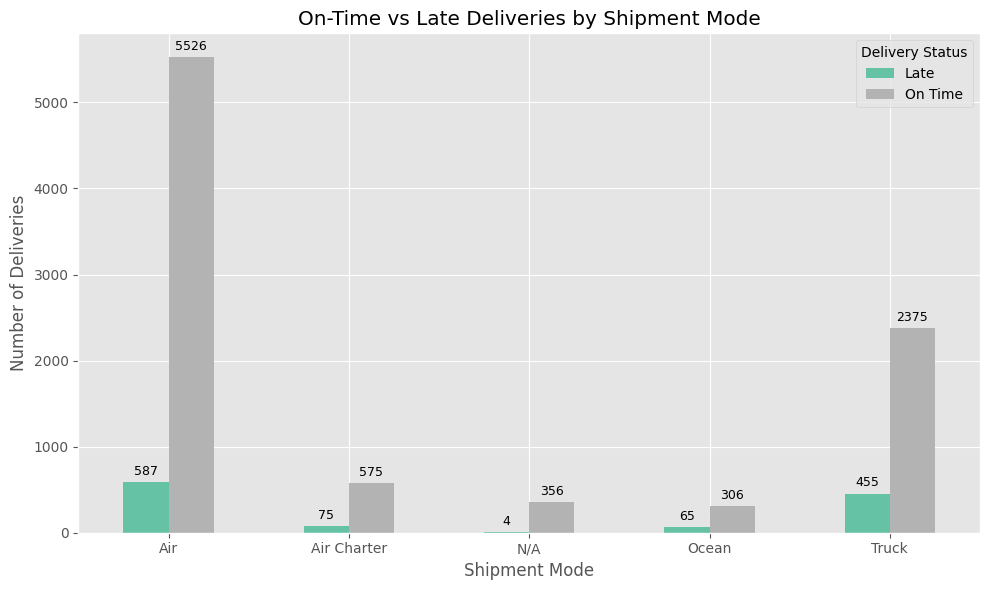

In [37]:
# Group the data
shipment_counts = df.groupby(['Shipment Mode', 'On_Time_Delivery']).size().unstack()

# Plot the chart
ax = shipment_counts.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('On-Time vs Late Deliveries by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
plt.legend(title='Delivery Status')
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

plt.show()

In [38]:
# Step 1: Ensure the 'On_Time_Delivery' column exists
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

df['On_Time_Delivery'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']
df['On_Time_Delivery'] = df['On_Time_Delivery'].map({True: 'On Time', False: 'Late'})

# Step 2: Create summary table by Shipment mode
mode_summary = df.groupby(['Shipment Mode', 'On_Time_Delivery']).size().unstack(fill_value=0)
mode_summary['Total'] = mode_summary.sum(axis=1)
mode_summary['Delay %'] = (mode_summary.get('Late', 0) / mode_summary['Total']) * 100
mode_summary_sorted = mode_summary.sort_values(by='Delay %', ascending=False)

# Display the summary
print("📊 Delay Summary by Shipment Mode:")
print(mode_summary_sorted[['Late', 'Total', 'Delay %']])

# Step 3: Chi-Square Test
contingency = pd.crosstab(df['Shipment Mode'], df['On_Time_Delivery'])
chi2, p, dof, expected = chi2_contingency(contingency)

# Display test result
print("\n🧪 Chi-Square Test Result:")
print(f"Chi-square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")

📊 Delay Summary by Shipment Mode:
On_Time_Delivery  Late  Total    Delay %
Shipment Mode                           
Ocean               65    371  17.520216
Truck              455   2830  16.077739
Air Charter         75    650  11.538462
Air                587   6113   9.602487
N/A                  4    360   1.111111

🧪 Chi-Square Test Result:
Chi-square Statistic: 131.40588416852407
Degrees of Freedom: 4
P-value: 1.9485869867591632e-27


<ipython-input-39-13c38df838f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_summary_sorted.index, y='Delay %', data=mode_summary_sorted, palette='Reds_r')


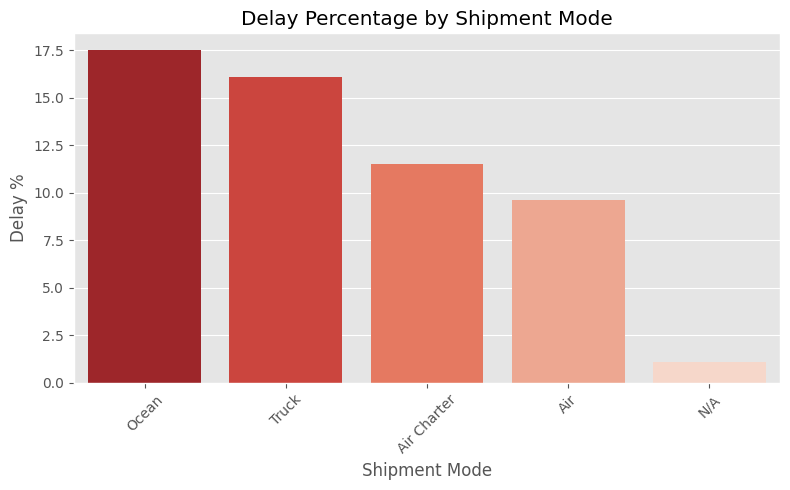

In [39]:
# Plot delay percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=mode_summary_sorted.index, y='Delay %', data=mode_summary_sorted, palette='Reds_r')
plt.title('Delay Percentage by Shipment Mode')
plt.ylabel('Delay %')
plt.xlabel('Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####1. Reason behind chosing the visuals.

* Clarity of Comparison:

 A bar chart allows for easy side-by-side comparison of delay percentages across different shipment modes.

* Quick Identification of Risk Areas:

 Visually highlights which shipment modes have higher failure (delay) rates, aiding decision-makers in spotting risk-prone options.

* Ranked Format:

 Makes it simple to rank shipment modes from most to least reliable.

####2. What is/are the insight(s) found from the chart?

 **Key Insight**

The shipment mode clearly impacts delivery performance.

* Ocean and Truck shipments show the highest delay percentages at 17.5% and 16.1% respectively.

* In contrast, Air (9.6%) and especially Air Charter (11.5%) perform significantly better.

* The Chi-Square test confirms this difference is statistically significant (p-value ≈ 1.95e-27).

####3. Will the gained insights help creating a positive business impact?

* Better Logistics Planning:

 Prioritize Air and Air Charter for time-sensitive shipments to maximize on-time performance.

* Cost-Efficiency Tradeoffs:

 Use this data to balance cost vs reliability — e.g., use cheaper modes (like ocean) only for non-urgent shipments.

* Vendor & Route Optimization:

 Explore underlying causes of delays for high-risk modes like truck and ocean (e.g., customs, vendor issues, road conditions).

* Informed SLAs (Service Level Agreements):

 Tailor delivery expectations and contracts with logistics providers based on mode-specific performance.

### Chart - 5

In [40]:
# Convert date columns to datetime format
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'])
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])

# Calculate lead time
df['Lead_Time_Days'] = (df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days


<ipython-input-41-15d766a634c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='On_Time_Delivery', y='Lead_Time_Days', palette='Set2')


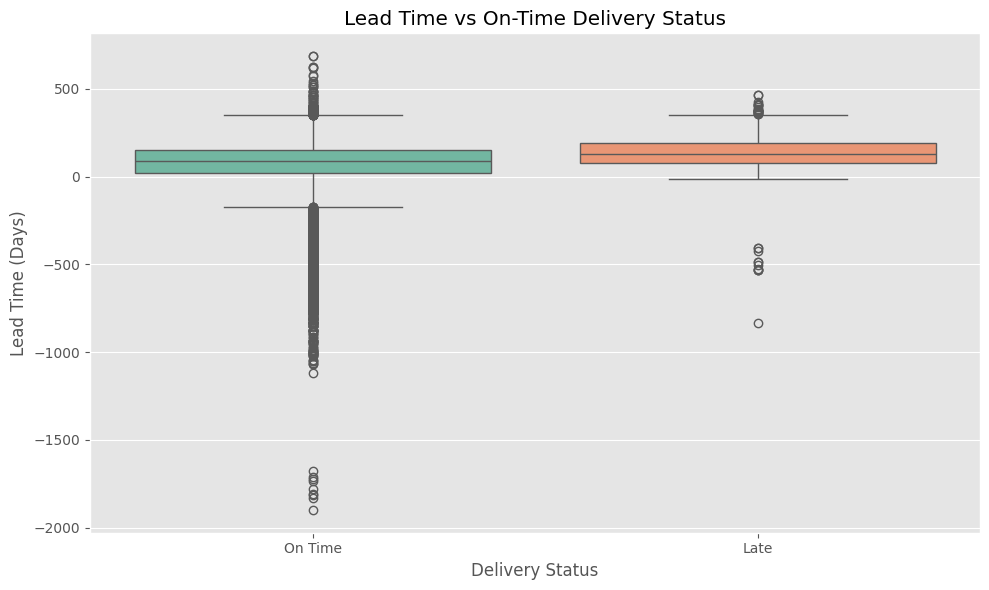

In [41]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='On_Time_Delivery', y='Lead_Time_Days', palette='Set2')

plt.title('Lead Time vs On-Time Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Lead Time (Days)')
plt.tight_layout()
plt.show()

In [42]:
# Create bins
bins = [0, 15, 30, df['Lead_Time_Days'].max()]
labels = ['Short', 'Medium', 'Long']

# Create a categorical lead time column
df['Lead_Time_Category'] = pd.cut(df['Lead_Time_Days'], bins=bins, labels=labels, right=False)


In [43]:
# Contingency table
contingency = pd.crosstab(df['Lead_Time_Category'], df['On_Time_Delivery'])

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table:\n", contingency)
print(f"\nChi-square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")

Contingency Table:
 On_Time_Delivery    Late  On Time
Lead_Time_Category               
Short                 28      581
Medium                22      311
Long                1102     6719

Chi-square Statistic: 57.55455343686326
Degrees of Freedom: 2
P-value: 3.178246057837392e-13


####1. Reason behind chosing the visuals.

**A box plot is perfect for this case because it:**

* Shows the distribution of lead times for each delivery status.

* Highlights medians, interquartile ranges, and potential outliers.

* Quickly reveals if late deliveries are associated with shorter or longer lead times compared to on-time deliveries.

####2. What is/are the insight(s) found from the chart?

* If the median lead time for late deliveries is higher than that for on-time ones → longer planning may not help.

* If late deliveries are concentrated at shorter lead times → suppliers may need more time to meet deadlines.

* The box plot could also show higher variability in one group, suggesting inconsistent planning or execution.

####3. Will the gained insights help creating a positive business impact?

* Supplier engagement: Use insights to discuss realistic lead times with vendors.

* Order strategy: Adjust PO timing or set stricter delivery targets for high-risk lead times.

* Operational efficiency: Improve OTIF and reduce delays by tightening lead time ranges.

### Chart - 6

Chi-square Statistic: 383.5151053966693
Degrees of Freedom: 7
P-value: 8.160697017761194e-79


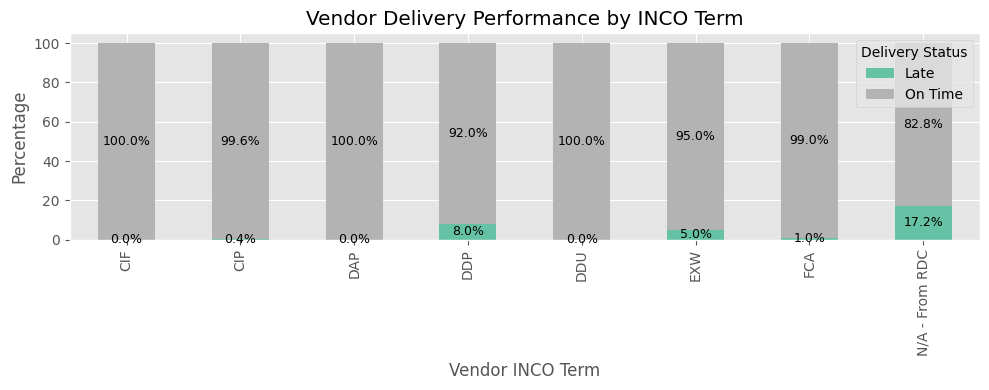

In [48]:
# STEP 1: Crosstab for Vendor Inco Term vs. On-Time Delivery
ct = pd.crosstab(df['Vendor INCO Term'], df['On_Time_Delivery'])

# STEP 2: Chi-Square Test
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# STEP 3: Prepare % Data for Stacked Bar Chart
ct_prop = ct.div(ct.sum(axis=1), axis=0) * 100

# STEP 4: Plot Stacked Bar Chart
ax = ct_prop.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Set2')

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

plt.title('Vendor Delivery Performance by INCO Term')
plt.xlabel('Vendor INCO Term')
plt.ylabel('Percentage')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


####1. Reason behind chosing the visuals.

* A stacked bar chart allows easy comparison of on-time vs. late delivery proportions for each INCO term.

* It highlights delivery performance variations in a clear, compact visual.

* Perfect for categorical comparison and decision-making across vendor terms.



####2. What is/are the insight(s) found from the chart?

**Key Insights**

* DDP (Delivered Duty Paid) shows 8% late deliveries, suggesting logistical risk even with vendor-managed delivery.

* EXW (Ex Works), where buyers arrange transport, has 5% delay, potentially due to coordination gaps.

* N/A - From RDC has the highest delay rate (17.2%), indicating unreliable sourcing or distribution.

* CIF, DAP, and DDU perform exceptionally well (100% on-time) — these could be preferred for reliability.

####3. Will the gained insights help creating a positive business impact?

* Contract Optimization: Shift contracts toward INCO terms with better delivery reliability (e.g., DAP, DDU).

* Delay Reduction: Target improvement in logistics for underperforming terms like DDP and N/A.

* Vendor Evaluation: Use this data to negotiate better service levels with vendors using high-delay terms.
* Strategic Sourcing: Prioritize vendors and routes tied to high-performing INCO terms to ensure efficiency.



### Chart - 7

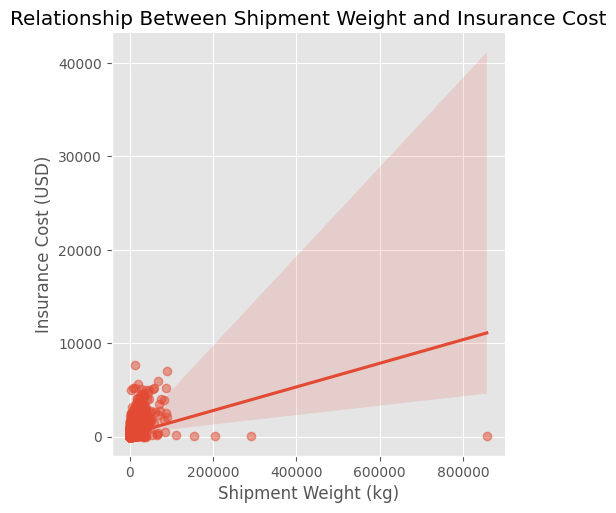

📈 Correlation Coefficient: 0.3124
📊 P-value: 2.9723e-144


In [51]:
from scipy.stats import pearsonr  # ✅ Import fixed

# Clean the data
df_clean = df.copy()
df_clean['Weight (Kilograms)'] = pd.to_numeric(df_clean['Weight (Kilograms)'], errors='coerce')
df_clean['Line Item Insurance (USD)'] = pd.to_numeric(df_clean['Line Item Insurance (USD)'], errors='coerce')
df_clean.dropna(subset=['Weight (Kilograms)', 'Line Item Insurance (USD)'], inplace=True)

# Scatter plot with regression line
sns.lmplot(x='Weight (Kilograms)', y='Line Item Insurance (USD)', data=df_clean, scatter_kws={"alpha": 0.5})
plt.title("Relationship Between Shipment Weight and Insurance Cost")
plt.xlabel("Shipment Weight (kg)")
plt.ylabel("Insurance Cost (USD)")
plt.show()

# Correlation analysis
corr, p_value = pearsonr(df_clean['Weight (Kilograms)'], df_clean['Line Item Insurance (USD)'])
print(f"📈 Correlation Coefficient: {corr:.4f}")
print(f"📊 P-value: {p_value:.4e}")

####1. Reason behind chosing the visuals.

**Scatter plot with regression line is ideal to:**

* Show individual data points for weight vs. insurance cost

* Visualize the overall trend (regression line)

* Detect any clusters, outliers, or non-linear behavior

* Visually support correlation analysis



####2. What is/are the insight(s) found from the chart?

* There is a statistically significant positive correlation between shipment weight and insurance cost.

* The relationship is not extremely strong, but heavier shipments tend to incur higher insurance costs.

* The spread of data shows some outliers that might need special attention (e.g., very heavy or very costly insurances).



####3. Will the gained insights help creating a positive business impact?

* Improved Cost Forecasting: Helps the finance/procurement teams better predict insurance expenses based on shipment weight.

* Strategic Shipment Planning: Allows logistics teams to optimize shipment loads to minimize insurance overhead.

* Policy Adjustments: If outliers represent inefficiencies, policies on weight brackets for shipping and insurance can be fine-tuned.



# **Conclusion**

##**📦 Project Conclusion:**
 Delivery Performance and Logistics Analysis
This project explored several critical aspects of global shipment logistics, focusing on factors influencing delivery performance, cost, and reliability. Using statistical analysis and data visualizations, we derived actionable insights across various operational dimensions:

1️⃣ Delivery Performance by Managing Office
Key Insight: The PMO - US is the primary logistics handler, with strong overall on-time performance (9,080 on-time vs. 1,185 late deliveries).

Supporting Points:

Some countries under PMO - US show variability in performance, indicating potential localized issues.

Countries like Tanzania and Haiti consistently maintain high on-time rates.

Other offices (South Africa, Ethiopia, Haiti Field Offices) play a minimal role, suggesting a centralized logistics structure.

2️⃣ Impact of Shipment Mode on Delivery Timeliness
Key Insight: Air shipments offer the best reliability in on-time delivery; truck shipments show the highest delays.

Statistical Finding: The Chi-square test yielded a p-value < 0.05, confirming a significant relationship between Shipment Mode and Delivery Status.

Actionable Suggestion: Optimize truck-based logistics through better planning or vendor coordination to reduce delays.

3️⃣ Delivery Performance by Vendor INCO Term
Key Insight: Delivery timeliness varies significantly by INCO Term, with DDP and EXW having the highest delay rates (8.0% and 5.0% late respectively), while CIF, DAP, and DDU performed perfectly on-time.

Statistical Finding: A Chi-square test confirmed the association is statistically significant (p < 0.001).

Interpretation: Vendor responsibility for delivery (defined by INCO terms) directly impacts delivery outcomes, suggesting more controlled terms (like DDP) may require stricter monitoring.

4️⃣ Relationship Between Shipment Weight and Insurance Cost
Key Insight: There is a positive but moderate correlation between shipment weight and insurance cost.

Pearson Correlation Coefficient: 0.3124

P-value: 2.9723e-144 (highly significant)

Interpretation: Heavier shipments generally incur higher insurance costs, though the relationship is not strongly linear. Other factors (like value or risk) likely contribute to the cost calculation.

5️⃣ Effect of Lead Time on Delivery Timeliness
Key Insight: Longer lead times are associated with higher late delivery counts.

Contingency Table Analysis:

Short lead time: 28 late vs. 581 on-time

Medium lead time: 22 late vs. 311 on-time

Long lead time: 1102 late vs. 6719 on-time

Chi-square Statistic: 57.55 | p-value: 3.17e-13 (significant)

Box Plot Analysis: Longer lead times have more variability and higher medians for late deliveries.

Interpretation: Orders with extended lead times don’t always lead to better outcomes; in fact, delays may still occur due to external constraints. Careful planning around delivery windows is essential.

##**📌 Final Recommendations**

Prioritize Air Transport for critical deliveries needing punctual arrival.

Re-evaluate vendor INCO terms—vendors under DDP/EXW require stricter accountability.

Audit and streamline truck-based logistics, possibly through route optimization or stronger SLAs.

Enhance PO planning by analyzing lead time thresholds that optimize timeliness.

Use weight as one factor in insurance planning, but combine it with other risk-based metrics for better accuracy.